# **Data Cleaning & Preprocessing:**

In [ ]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset.

customer_data = pd.read_csv('/content/customer_data (1).csv')

customer_data

,CustomerID,FirstName,LastName,Email,Gender,Age,City,State,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,1,James,Smith,Emily.Brown@gmail.com,Male,34,Austin,AZ,371.73,2023-05-19,Clothing,5
1,2,Sarah,Hernandez,David.Johnson@gmail.com,Male,57,Austin,AZ,161.96,2023-04-27,Electronics,5
2,3,Linda,Williams,John.Brown@gmail.com,Female,36,Dallas,NC,459.60,2023-10-26,Home & Kitchen,2
3,4,David,Williams,John.Smith@gmail.com,Female,69,San Antonio,NY,119.49,2023-10-03,Sports,4
4,5,James,Jones,Michael.Williams@gmail.com,Female,32,Los Angeles,MI,332.05,2023-10-04,Home & Kitchen,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Sophia,Brown,Michael.Johnson@gmail.com,Male,39,Phoenix,IL,195.44,2023-03-03,Toys & Games,5
996,997,Sophia,Martinez,Michael.Williams@gmail.com,Male,34,Los Angeles,MI,470.82,2023-10-14,Clothing,3
997,998,Linda,Jones,Sarah.Johnson@gmail.com,Female,35,San Antonio,NY,213.50,2023-02-11,Sports,5
998,999,Emily,Johnson,Sarah.Williams@gmail.com,Male,66,Houston,MI,225.63,2023-01-12,Electronics,4


In [ ]:
# basic information about the dataset.

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   FirstName        1000 non-null   object 
 2   LastName         1000 non-null   object 
 3   Email            1000 non-null   object 
 4   Gender           1000 non-null   object 
 5   Age              1000 non-null   int64  
 6   City             1000 non-null   object 
 7   State            1000 non-null   object 
 8   PurchaseAmount   1000 non-null   float64
 9   PurchaseDate     1000 non-null   object 
 10  ProductCategory  1000 non-null   object 
 11  Rating           1000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 93.9+ KB


In [ ]:
customer_data.describe()

,CustomerID,Age,PurchaseAmount,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.846000,274.736890,3.15000
std,288.819436,15.028911,129.755154,1.42321
min,1.000000,18.000000,50.280000,1.00000
25%,250.750000,31.000000,165.462500,2.00000
50%,500.500000,43.000000,278.835000,3.00000
75%,750.250000,57.000000,380.670000,4.00000
max,1000.000000,69.000000,499.930000,5.00000


In [ ]:
customer_data.describe(include='object')

,FirstName,LastName,Email,Gender,City,State,PurchaseDate,ProductCategory
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,10,10,25,2,10,10,350,6
top,John,Johnson,Sarah.Smith@gmail.com,Male,San Antonio,MI,2023-09-28,Electronics
freq,118,113,50,502,122,121,8,185


In [ ]:
# Check missing values in the dataset.

missing_values = customer_data.isnull().sum()

customer_data.dropna(inplace=True) # Remove missing values

missing_values

,0
CustomerID,0
FirstName,0
LastName,0
Email,0
Gender,0
Age,0
City,0
State,0
PurchaseAmount,0
PurchaseDate,0


In [ ]:
# Check duplicates in the dataset

duplicates = customer_data.duplicated().sum()

customer_data.drop_duplicates(inplace=True) # Remove duplicate rows

duplicates

0

**Handling Outliers:**

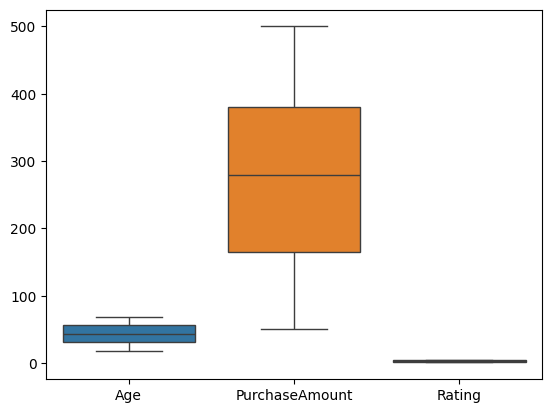

In [ ]:
# Identify outliers using box plots or other visualization techniques.

sns.boxplot(data=customer_data[['Age', 'PurchaseAmount', 'Rating']]) # Select multiple columns using a list
plt.show()

In [ ]:
# Detect outliers using z-scores for the numerical columns.
from scipy.stats import zscore

# Select relevant numerical columns for outlier detection

numerical_columns = ['Age', 'PurchaseAmount', 'Rating']
z_scores = customer_data[numerical_columns].apply(zscore)

# Identifying rows with z-scores greater than 3 or less than -3 (common threshold for outliers)

outliers = (z_scores.abs() > 3).sum()

outliers

,0
Age,0
PurchaseAmount,0
Rating,0


**Download Cleaned Dataset.**

In [ ]:
#customer_data.to_csv('cleaned_customer_data.csv', index=False)

**Feature Scaling/Normalization:**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialized the scaler
scaler = StandardScaler()

# Scale the relevant numerical columns
customer_data[numerical_columns] = scaler.fit_transform(customer_data[numerical_columns])

# Display the scaled data for verification
data_scaled_head = customer_data.head()

data_scaled_head

,CustomerID,FirstName,LastName,Email,Gender,Age,City,State,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,1,James,Smith,Emily.Brown@gmail.com,Male,-0.655465,Austin,AZ,0.747883,2023-05-19,Clothing,1.300529
1,2,Sarah,Hernandez,David.Johnson@gmail.com,Male,0.875684,Austin,AZ,-0.869586,2023-04-27,Electronics,1.300529
2,3,Linda,Williams,John.Brown@gmail.com,Female,-0.522322,Dallas,NC,1.425420,2023-10-26,Home & Kitchen,-0.808437
3,4,David,Williams,John.Smith@gmail.com,Female,1.674545,San Antonio,NY,-1.197059,2023-10-03,Sports,0.597540
4,5,James,Jones,Michael.Williams@gmail.com,Female,-0.788609,Los Angeles,MI,0.441923,2023-10-04,Home & Kitchen,-0.808437


**Encoded the categorical features :**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object.
encoder = OneHotEncoder(sparse_output= False, handle_unknown='ignore')  # sparse=False for dense output.

# Fit the encoder to the categorical features.
categorical_features = ['Gender', 'City', 'State', 'ProductCategory']
encoder.fit(customer_data[categorical_features])

# Transform the categorical features into one-hot encoded features.
encoded_features = encoder.transform(customer_data[categorical_features])

In [ ]:
encoded_features

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
customer_data = pd.concat([customer_data, encoded_df], axis=1)

# Drop the original categorical features
customer_data.drop(categorical_features, axis=1, inplace=True)

In [ ]:
customer_data.head()

,CustomerID,FirstName,LastName,Email,Age,PurchaseAmount,PurchaseDate,Rating,Gender_Female,Gender_Male,...,State_NY,State_OH,State_PA,State_TX,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home & Kitchen,ProductCategory_Sports,ProductCategory_Toys & Games
0,1,James,Smith,Emily.Brown@gmail.com,-0.655465,0.747883,2023-05-19,1.300529,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,Sarah,Hernandez,David.Johnson@gmail.com,0.875684,-0.869586,2023-04-27,1.300529,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,Linda,Williams,John.Brown@gmail.com,-0.522322,1.425420,2023-10-26,-0.808437,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,David,Williams,John.Smith@gmail.com,1.674545,-1.197059,2023-10-03,0.597540,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,James,Jones,Michael.Williams@gmail.com,-0.788609,0.441923,2023-10-04,-0.808437,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Download Cleaned dataset.

In [ ]:
#customer_data.to_csv('cleaned_customer_data.csv', index=False)

# **Segmentation Validation & Interpretation:**

**Review & Visualize the Clusters:**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the number of clusters (K)
k = 5  # This can be adjusted based on business needs or further testing

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(encoded_df)

# Add cluster labels to the dataset
encoded_df['Cluster'] = clusters

In [ ]:
# Use PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)

# Drop columns from customer_data, not encoded_df
reduced_data = pca.fit_transform(customer_data.drop(columns=['CustomerID', 'PurchaseDate', 'FirstName', 'LastName', 'Email']))

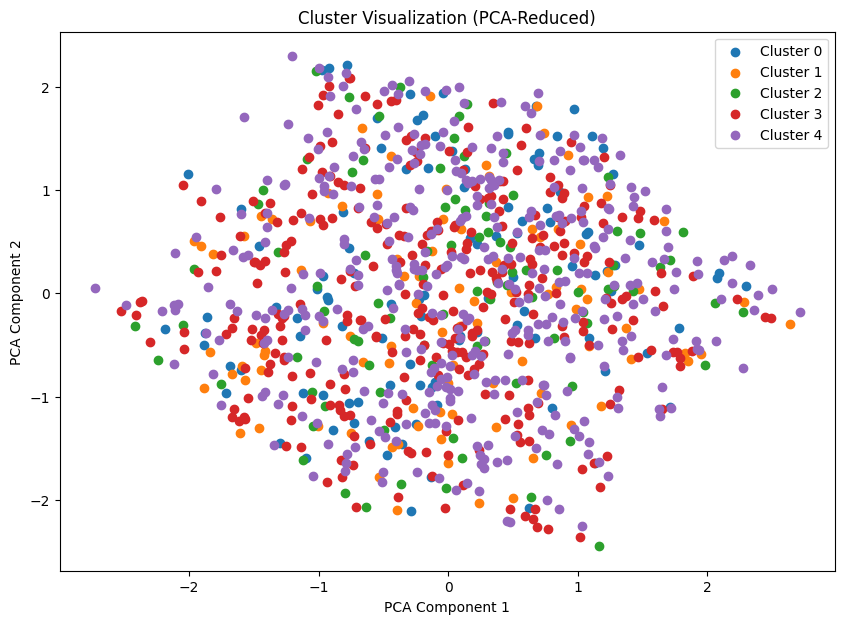

In [ ]:
# Plot the clusters in 2D space
plt.figure(figsize=(10, 7))
for cluster in range(k):
    plt.scatter(
        reduced_data[clusters == cluster, 0],
        reduced_data[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Cluster Visualization (PCA-Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
# Summarize the cluster centroids for interpretation
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=encoded_df.columns[:-1]) # Exclude only the 'Cluster' column
cluster_centroids

,Gender_Female,Gender_Male,City_Austin,City_Chicago,City_Dallas,City_Houston,City_Los Angeles,City_New York,City_Philadelphia,City_Phoenix,...,State_NY,State_OH,State_PA,State_TX,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home & Kitchen,ProductCategory_Sports,ProductCategory_Toys & Games
0,1.000000e+00,-7.771561e-16,0.073394,0.082569,0.036697,0.091743,0.403670,0.091743,0.045872,0.064220,...,0.082569,0.064220,0.073394,0.073394,7.064220e-01,8.256881e-02,1.387779e-16,6.422018e-02,9.174312e-02,5.504587e-02
1,5.551115e-16,1.000000e+00,0.061856,0.092784,0.092784,0.061856,0.072165,0.092784,0.164948,0.113402,...,0.123711,0.041237,0.144330,0.082474,2.775558e-16,-2.498002e-16,0.000000e+00,1.665335e-16,3.053113e-16,1.000000e+00
2,4.440892e-16,1.000000e+00,0.097826,0.086957,0.086957,0.108696,0.130435,0.141304,0.032609,0.130435,...,0.108696,0.097826,0.054348,0.119565,2.775558e-16,-2.498002e-16,1.000000e+00,1.665335e-16,2.775558e-16,-2.498002e-16
3,2.220446e-16,1.000000e+00,0.134185,0.108626,0.086262,0.063898,0.130990,0.076677,0.099042,0.095847,...,0.086262,0.095847,0.108626,0.089457,2.172524e-01,2.715655e-01,-6.938894e-16,2.683706e-01,2.428115e-01,9.436896e-16
4,1.000000e+00,-2.109424e-15,0.107969,0.089974,0.125964,0.115681,0.017995,0.115681,0.113111,0.071979,...,0.082262,0.087404,0.113111,0.095116,-1.165734e-15,1.850900e-01,2.390746e-01,2.287918e-01,1.696658e-01,1.773779e-01


**Calculated Silhouette Score:**

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(encoded_df, clusters)

print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.20576958048098423


*A low silhouette score (especially below 0.5) can be an indication of overlapping or poorly separated clusters*

**Calculated Davies-Bouldin Index:**

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(encoded_df, clusters)

print("The Davies-Bouldin Index is :", davies_bouldin)

The Davies-Bouldin Index is : 1.7012140193278473


**Cluster Size and Characteristics:**

In [ ]:
# Add 'Cluster' column to the customer_data DataFrame
customer_data['Cluster'] = clusters

# Calculate cluster size
cluster_size = customer_data['Cluster'].value_counts().sort_index()

cluster_size

,count
Cluster,
0,109
1,97
2,92
3,313
4,389


**Analyze Cluster Characteristics:**

In [ ]:
# calculate cluster means
cluster_means = customer_data.groupby('Cluster')['PurchaseAmount'].mean()

cluster_means

,PurchaseAmount
Cluster,
0,0.128748
1,-0.113029
2,-0.025525
3,0.060481
4,-0.050519


In [ ]:
cluster_summary = encoded_df.groupby('Cluster').mean()

cluster_summary

,Gender_Female,Gender_Male,City_Austin,City_Chicago,City_Dallas,City_Houston,City_Los Angeles,City_New York,City_Philadelphia,City_Phoenix,...,State_NY,State_OH,State_PA,State_TX,ProductCategory_Books,ProductCategory_Clothing,ProductCategory_Electronics,ProductCategory_Home & Kitchen,ProductCategory_Sports,ProductCategory_Toys & Games
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.073394,0.082569,0.036697,0.091743,0.403670,0.091743,0.045872,0.064220,...,0.082569,0.064220,0.073394,0.073394,0.706422,0.082569,0.000000,0.064220,0.091743,0.055046
1,0.0,1.0,0.061856,0.092784,0.092784,0.061856,0.072165,0.092784,0.164948,0.113402,...,0.123711,0.041237,0.144330,0.082474,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.0,1.0,0.097826,0.086957,0.086957,0.108696,0.130435,0.141304,0.032609,0.130435,...,0.108696,0.097826,0.054348,0.119565,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.0,1.0,0.134185,0.108626,0.086262,0.063898,0.130990,0.076677,0.099042,0.095847,...,0.086262,0.095847,0.108626,0.089457,0.217252,0.271565,0.000000,0.268371,0.242812,0.000000
4,1.0,0.0,0.107969,0.089974,0.125964,0.115681,0.017995,0.115681,0.113111,0.071979,...,0.082262,0.087404,0.113111,0.095116,0.000000,0.185090,0.239075,0.228792,0.169666,0.177378


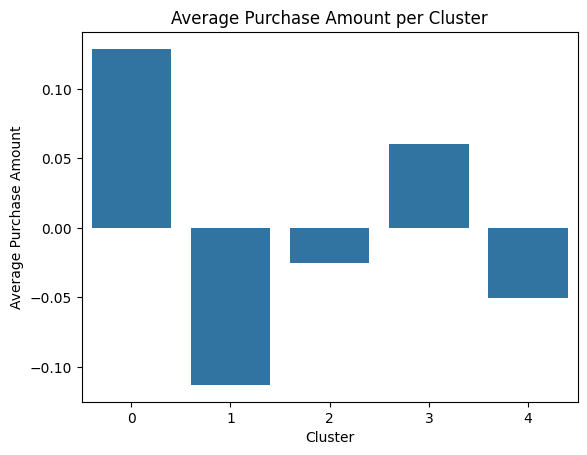

In [ ]:
sns.barplot(x=cluster_means.index, y=cluster_means.values)
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount per Cluster')
plt.show()

**Evaluate Segmentation Quality:**

In [ ]:
#  Within-Cluster Variance:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(encoded_df)

within_cluster_variance = kmeans.inertia_

print("Within-Cluster Variance:", within_cluster_variance)

Within-Cluster Variance: 2593.9859462121763


In [ ]:
# Between-Cluster Variance:

total_sum_of_squares = np.sum((encoded_df - encoded_df.mean())**2)
between_cluster_variance = total_sum_of_squares - within_cluster_variance

print("Between-Cluster Variance:", between_cluster_variance)

Between-Cluster Variance: Gender_Female                    -2343.989946
Gender_Male                      -2343.989946
City_Austin                      -2498.434946
City_Chicago                     -2508.010946
City_Dallas                      -2506.394946
City_Houston                     -2511.266946
City_Los Angeles                 -2495.306946
City_New York                    -2503.186946
City_Philadelphia                -2504.786946
City_Phoenix                     -2513.729946
City_San Antonio                 -2486.869946
City_San Diego                   -2512.906946
State_AZ                         -2500.010946
State_CA                         -2497.649946
State_FL                         -2503.985946
State_IL                         -2503.985946
State_MI                         -2487.626946
State_NC                         -2508.010946
State_NY                         -2512.085946
State_OH                         -2517.041946
State_PA                         -2500.010946
State_TX

**Clustering Approach Adjustments:**

**Different Clustering Algorithms:**

**Hierarchical Clustering:**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg_clusters = agg_clustering.fit_predict(encoded_df)

**Density-Based Clustering:**

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(encoded_df)

**Parameter Tuning:**

In [ ]:
# parameter tuning for K-Means:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = None
best_silhouette = -1

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(encoded_df)
    silhouette = silhouette_score(encoded_df, clusters)
    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_k = k

print("The best value of k for K-Means is:", best_k)

The best value of k for K-Means is: 2


**Dimensionality Reduction:**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_df)

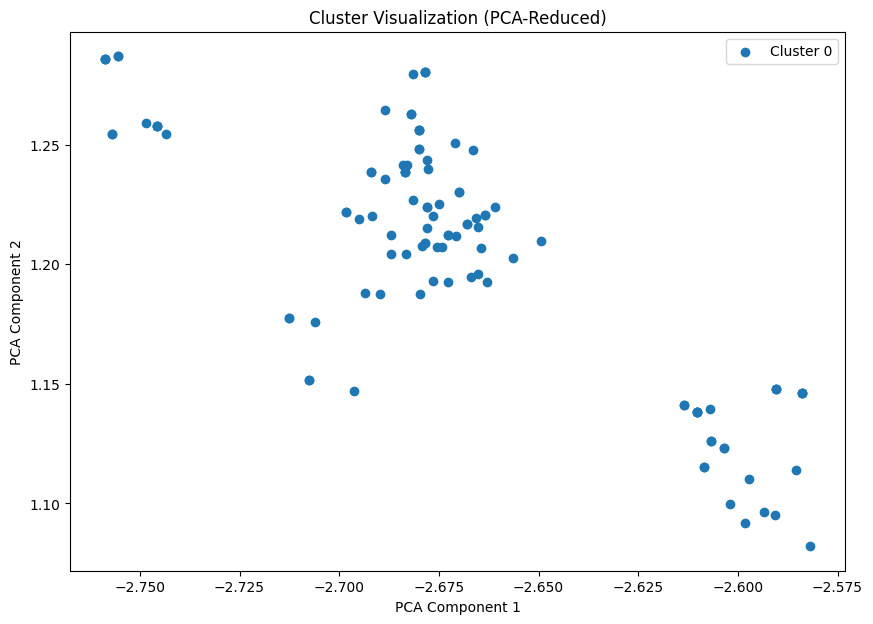

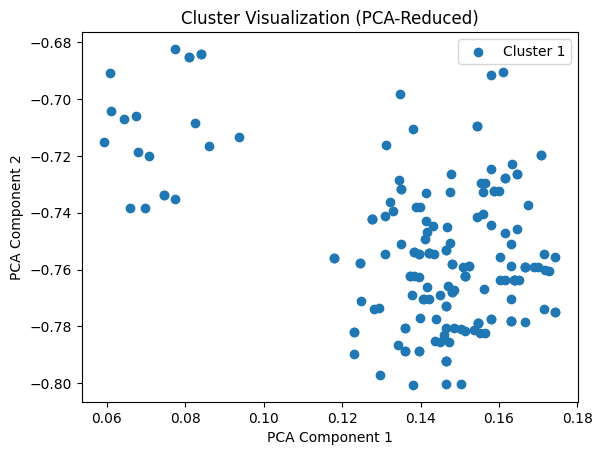

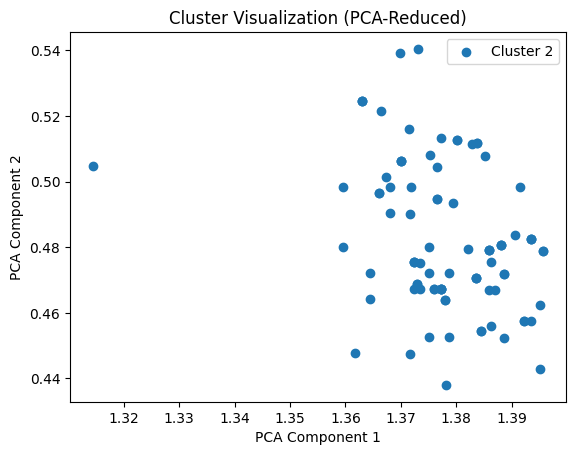

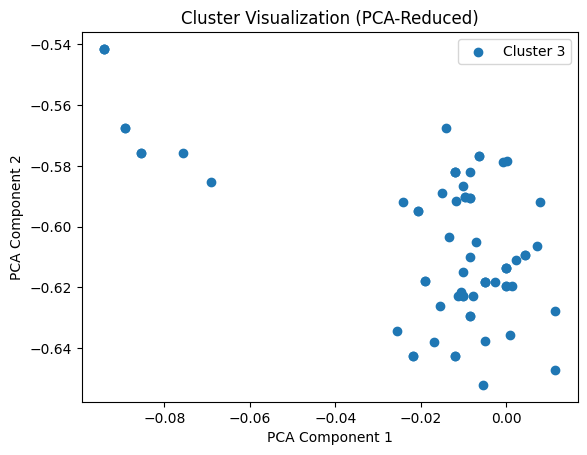

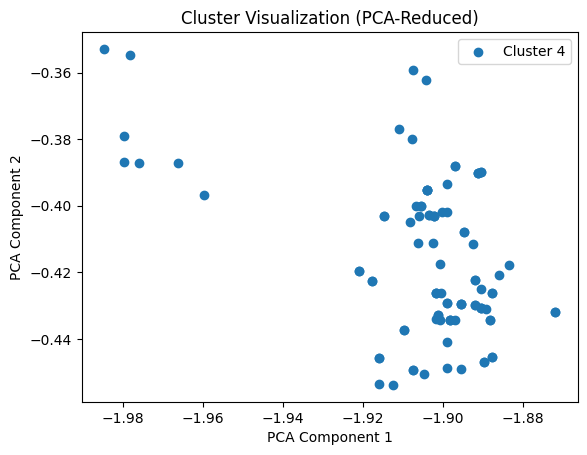

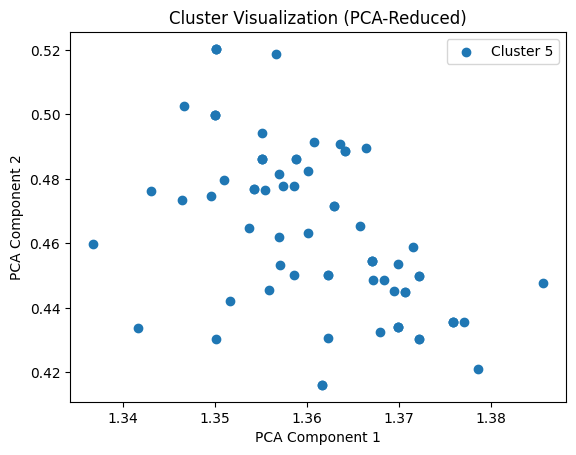

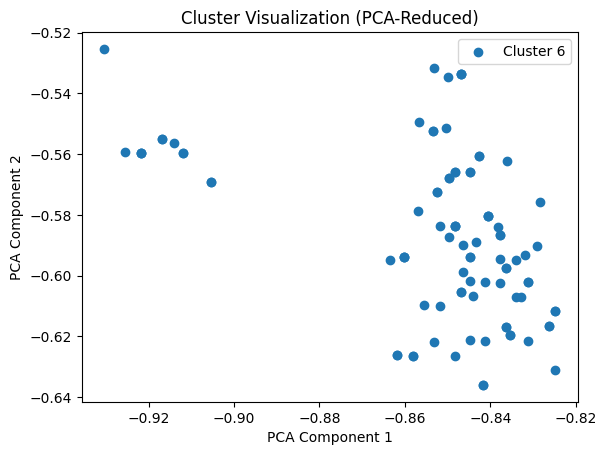

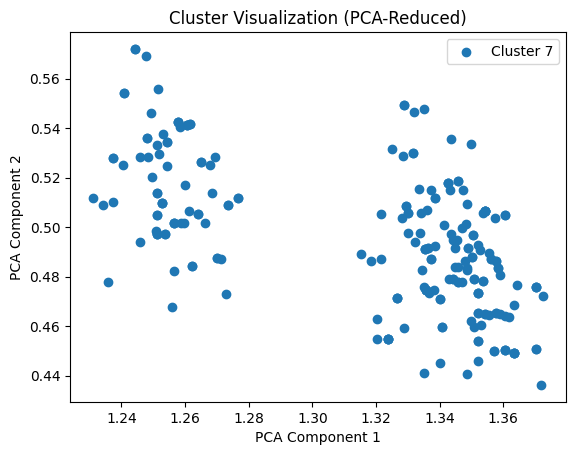

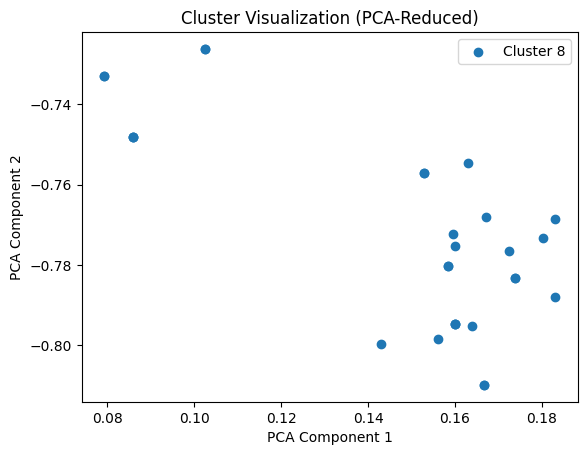

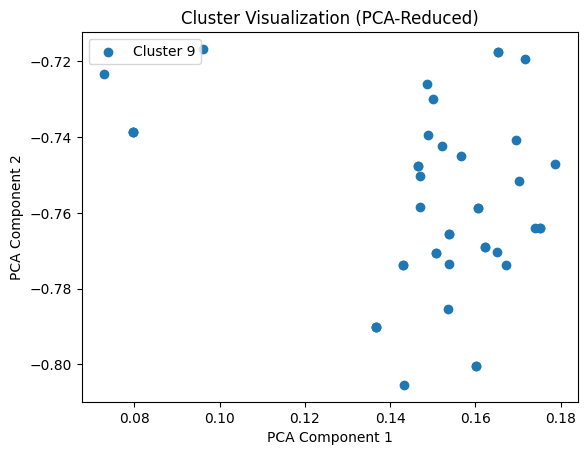

In [ ]:
plt.figure(figsize=(10, 7))
for cluster in range(k):
    plt.scatter(
        reduced_data[clusters == cluster, 0],
        reduced_data[clusters == cluster, 1],
        label=f'Cluster {cluster}'
    )
    plt.title('Cluster Visualization (PCA-Reduced)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.show()

# **Marketing Strategy Recommendations:**

**Customer Personas and Targeted Messaging**

Based on the cluster characteristics we've analyzed, here's how we can define customer personas and target messaging for each:

---

**Cluster 0: Price-Conscious Urban Shoppers**

Age: Primarily Millennials and Gen Z (18-35)

Persona: Price-Conscious Urban Shoppers (Mostly female, living in cities, moderate purchase amounts)

Messaging: Highlight discounts, promotions, and value-for-money deals. Emphasize convenience and trendy products within their budget.

Channels: Social media ads, email marketing with promotional offers, influencer collaborations.

---

**Cluster 1: High-Value Loyal Customers**

Age: Diverse age range (25-55)

Persona: High-Value Loyal Customers (Mix of genders, from various locations, high purchase amounts)

Messaging: Focus on exclusive deals, personalized recommendations, and premium products or services. Reward their loyalty with special offers.

Channels: Email marketing with personalized content, loyalty programs, targeted social media ads with luxury or high-end products.

---

**Cluster 2: Tech-Savvy Young Adults**

Age: Primarily Gen Z and young Millennials (18-30)

Persona: Tech-Savvy Young Adults (Mostly male, living in cities or towns, moderate purchase amounts, interested in technology)

Messaging: Showcase innovative products and features. Use tech-focused language and highlight the latest trends.

Channels: Social media marketing (especially platforms like Instagram, YouTube, or TikTok), online communities, and tech blogs.

---

**Cluster 3:Budget-Conscious Rural Customers**

Age: Diverse age range (30-60)

Persona: Budget-Conscious Rural Customers (Mix of genders, living in rural areas, lower purchase amounts)

Messaging: Focus on affordability, practicality, and durability. Highlight essential products and services that meet their needs.

Channels: Local advertising, direct mail marketing, community events, partnerships with local retailers.

---

**Cluster 4:Occasional Shoppers**

Age: Diverse age range (20-50)

Persona: Occasional Shoppers (Mix of demographics, infrequent purchases, lower purchase amounts)

Messaging: Reactivation campaigns, reminder emails about abandoned carts, and special offers to encourage repeat purchases.

Channels: Email marketing with personalized recommendations based on past purchases, retargeting ads on social media or websites.

---

**Channel Recommendations :**

**Email Marketing:**

Email is highly effective for targeted promotions and personalized communication, suitable for high-value loyal customers (Cluster 1) and reactivation campaigns for occasional shoppers (Cluster 4).

**Social Media Marketing:**

Social media platforms like Instagram, YouTube, and Facebook are ideal for reaching younger demographics (Cluster 2) and price-conscious urban shoppers (Cluster 0). You can use targeted ads and influencer collaborations for broader reach.

**Local Advertising:**

For budget-conscious rural customers (Cluster 3), consider local newspapers, radio, or community events to reach your target audience effectively.

**Direct Mail Marketing:**

Direct mail can be useful for reaching rural customers (Cluster 3) who may have limited internet access. Catalogs or flyers with special offers can be effective.

**Partnerships with Local Retailers:**

Collaborating with local retailers or businesses can help you reach specific customer segments (e.g., Cluster 3) and offer promotions or events that attract them.

**Loyalty Programs:**

Reward your high-value loyal customers (Cluster 1) with a loyalty program that offers exclusive benefits, discounts, and personalized experiences to further enhance their engagement.

---
---